# Profit Forecasting with neural network

This notebook contains the implementation of a MLP. The pre processing of the data is done in the same way as in the main pipeline. 

## Import Statements

In [1]:
# import statements 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# neural network packages 
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

# metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Pre-Processing

In [ ]:
# load data
data = pd.read_csv("train.csv")

# feature selection 
data = data.drop(['id', 'country'], axis=1)

# one hot encoding
data = pd.get_dummies(data=data, columns=['ship_mode', 'segment', 'region', 'state', 'city', 'postal_code', 'category', 'sub_category'])

X = data.drop('profit', axis=1)
y = data['profit']

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling of numerical features
scaler = MinMaxScaler()
scaler.fit(X_train[['discount', 'sales', 'quantity']])
X_train[['discount', 'sales', 'quantity']] = scaler.transform(X_train[['discount', 'sales', 'quantity']])
X_test[['discount', 'sales', 'quantity']] = scaler.transform(X_test[['discount', 'sales', 'quantity']])



## Implementation of MLP

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 921)               849162    
                                                                 
 dense_171 (Dense)           (None, 30)                27660     
                                                                 
 dropout_28 (Dropout)        (None, 30)                0         
                                                                 
 dense_172 (Dense)           (None, 30)                930       
                                                                 
 dropout_29 (Dropout)        (None, 30)                0         
                                                                 
 dense_173 (Dense)           (None, 30)                930       
                                                                 
 dropout_30 (Dropout)        (None, 30)              

173/173 [==============================] - 1s 8ms/step - loss: 21.5810 - val_loss: 36.9032
Epoch 66/150
166/173 [===========================>..] - ETA: 0s - loss: 22.1331
Epoch 66: val_loss did not improve from 36.43623
173/173 [==============================] - 1s 8ms/step - loss: 21.9139 - val_loss: 36.7088
Epoch 67/150
173/173 [==============================] - ETA: 0s - loss: 22.7547
Epoch 67: val_loss did not improve from 36.43623
173/173 [==============================] - 1s 8ms/step - loss: 22.7547 - val_loss: 36.6031
Epoch 68/150
173/173 [==============================] - ETA: 0s - loss: 21.6682
Epoch 68: val_loss did not improve from 36.43623
173/173 [==============================] - 1s 8ms/step - loss: 21.6682 - val_loss: 36.6624
Epoch 69/150
168/173 [============================>.] - ETA: 0s - loss: 21.7016
Epoch 69: val_loss did not improve from 36.43623
173/173 [==============================] - 1s 8ms/step - loss: 21.7054 - val_loss: 36.8647
Epoch 70/150
169/173 [=======

Epoch 102/150
167/173 [===========================>..] - ETA: 0s - loss: 19.5162
Epoch 102: val_loss improved from 35.91755 to 34.62108, saving model to my_best_model.hdf5
173/173 [==============================] - 1s 8ms/step - loss: 19.3216 - val_loss: 34.6211
Epoch 103/150
173/173 [==============================] - ETA: 0s - loss: 18.6591
Epoch 103: val_loss did not improve from 34.62108
173/173 [==============================] - 1s 8ms/step - loss: 18.6591 - val_loss: 35.9334
Epoch 104/150
172/173 [============================>.] - ETA: 0s - loss: 18.6943
Epoch 104: val_loss did not improve from 34.62108
173/173 [==============================] - 1s 8ms/step - loss: 18.6853 - val_loss: 35.0900
Epoch 105/150
173/173 [==============================] - ETA: 0s - loss: 18.8804
Epoch 105: val_loss did not improve from 34.62108
173/173 [==============================] - 1s 8ms/step - loss: 18.8804 - val_loss: 36.3285
Epoch 106/150
167/173 [===========================>..] - ETA: 0s - loss

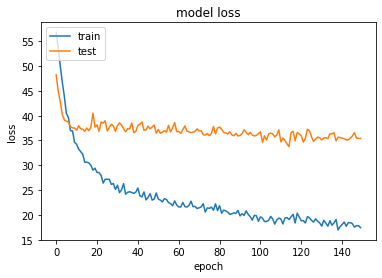

In [47]:
# fix random seed
np.random.seed(42)

# initiate neural network
model = Sequential()

# input layer with 921 neurons
model.add(Dense(921, input_dim=921, activation='relu'))

# 3 hidden layer with 30 neurons each and dropout function to avoid overfitting
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.25))

# output layer with 1 neuron to predict single value 
model.add(Dense(1))

# compile model
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

# create checkpoint for saving best model 
checkpoint = ModelCheckpoint(filepath='my_best_model.hdf5', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = checkpoint

# fit model 
history = model.fit(X_train, y_train, validation_split=0.25, epochs=150, batch_size=25, verbose=1, callbacks=callbacks)  

# predictions
model = load_model('my_best_model.hdf5')
predictions = model.predict(X_test)

# model evaluation
print ('R2_Score:', r2_score(y_test, predictions))
print ('RMSE:', mean_squared_error(y_test, predictions, squared=False))
print ('MAE:', mean_absolute_error(y_test, predictions))

# plot learning curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





